In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [13]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('gender_submission.csv')

In [343]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [134]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [135]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [136]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:xlabel='Embarked', ylabel='count'>

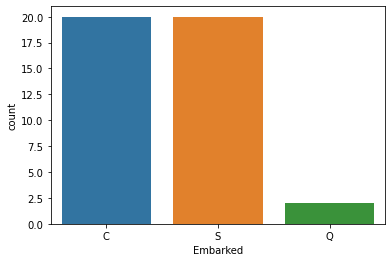

In [344]:
check = train[(train['Fare']>=75) & (train['Fare']<=95)].sort_values(by=['Fare'])
sns.countplot(data=check, x='Embarked')

In [345]:
train_val = train.drop(columns=['Ticket','PassengerId','Name'])

In [346]:
train_val.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [347]:
train_val['Sex'] = train_val['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [348]:
train_val['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [349]:
train_check = pd.get_dummies(train_val['Embarked'],drop_first=True)

In [350]:
final_df = pd.concat([train_val, train_check],axis=1)

In [351]:
change_shit = final_df[final_df['Age'].notnull()]
change_shit = change_shit[['Age','Pclass']]

In [352]:
change_shit = change_shit.groupby(['Pclass']).mean()
change_shit

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [353]:
np_age = change_shit.to_numpy()
np_age[0][0]

38.233440860215055

In [354]:
def change_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return np_age[0][0]

        elif Pclass == 2:
            return np_age[1][0]

        else:
            return np_age[2][0]

    else:
        return Age

In [355]:
final_df['Age'] = final_df[['Age','Pclass']].apply(change_age,axis=1)
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Q,S
0,0,3,1,22.0,1,0,7.2500,NaN,S,0,1
1,1,1,0,38.0,1,0,71.2833,C85,C,0,0
2,1,3,0,26.0,0,0,7.9250,NaN,S,0,1
3,1,1,0,35.0,1,0,53.1000,C123,S,0,1
4,0,3,1,35.0,0,0,8.0500,NaN,S,0,1


In [356]:
final_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Q             0
S             0
dtype: int64

In [358]:
final_df = final_df.drop(['Embarked'],axis=1)
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [175]:
#final_df = pd.read_csv('final_df.csv')

In [359]:
final_df['AgeFare'] = final_df['Age'] * final_df['Fare']

<AxesSubplot:xlabel='AgeFare', ylabel='Survived'>

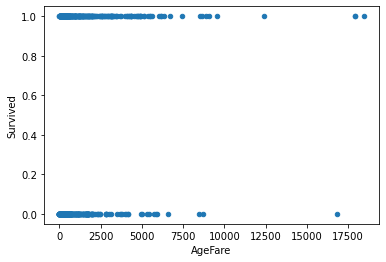

In [360]:
df_viz = final_df[['AgeFare','Survived']]
df_viz.plot(x='AgeFare', y='Survived', kind='scatter')

In [361]:
final_df[['AgeFare','Survived']].groupby('Survived').sum()

,AgeFare
Survived,
0,384561.672427
1,526596.165717


In [362]:
df_check = pd.get_dummies(final_df['Parch'],drop_first=True,prefix='Parch')
final_df = pd.concat([final_df, df_check],axis=1)
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,AgeFare,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,3,1,22.0,1,0,7.2500,0,1,159.5000,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2708.7654,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,206.0500,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,1,1858.5000,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,1,281.7500,0,0,0,0,0,0


In [363]:
df_check = pd.get_dummies(final_df['SibSp'],drop_first=True,prefix='SibSp')
final_df = pd.concat([final_df, df_check],axis=1)
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,AgeFare,...,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,3,1,22.0,1,0,7.2500,0,1,159.5000,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2708.7654,...,0,0,0,0,1,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,206.0500,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,1,1858.5000,...,0,0,0,0,1,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,1,281.7500,...,0,0,0,0,0,0,0,0,0,0


In [364]:
df_check = pd.get_dummies(final_df['Pclass'],drop_first=True,prefix='Pclass')
final_df = pd.concat([final_df, df_check],axis=1)
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,AgeFare,...,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_2,Pclass_3
0,0,3,1,22.0,1,0,7.2500,0,1,159.5000,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,0,0,2708.7654,...,0,0,1,0,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,206.0500,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,1,1858.5000,...,0,0,1,0,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,1,281.7500,...,0,0,0,0,0,0,0,0,0,1


In [365]:
final_df = final_df.drop([('SibSp')],axis=1)
final_df = final_df.drop([('Parch')],axis=1)
final_df = final_df.drop([('Pclass')],axis=1)
final_df.head()

,Survived,Sex,Age,Fare,Q,S,AgeFare,Parch_1,Parch_2,Parch_3,...,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_2,Pclass_3
0,0,1,22.0,7.2500,0,1,159.5000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,38.0,71.2833,0,0,2708.7654,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,26.0,7.9250,0,1,206.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,35.0,53.1000,0,1,1858.5000,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,35.0,8.0500,0,1,281.7500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [366]:
in_3 = np.arange(start=0, stop=100, step=3)
def age_class(age):
    #get age index in 3 by 3 array
    ind = int(age // 3)
    return in_3[ind]

final_df['Age_cluster'] = final_df['Age'].apply(age_class)
df_check = pd.get_dummies(final_df['Age_cluster'],drop_first=True,prefix='Age')
final_df = pd.concat([final_df, df_check],axis=1)
final_df = final_df.drop(['Age'],axis=1)

In [367]:
in_25 = np.arange(start=final_df['Fare'].min(), stop=final_df['Fare'].max(), step=25)
def fare_class(fare):
    #get fare index in 25 ++ array
    ind = int(fare // 25)
    return in_25[ind]

final_df['Fare_cluster'] = final_df['Fare'].apply(fare_class)
df_check = pd.get_dummies(final_df['Fare_cluster'],drop_first=True,prefix='Fare')
final_df = pd.concat([final_df, df_check],axis=1)
final_df = final_df.drop(['Fare'],axis=1)

In [368]:
in_1 = np.arange(start=0, stop=2500, step=150)
in_2 = np.arange(start=2500, stop=7500, step=500)
in_3 = np.arange(start=7500, stop=final_df['AgeFare'].max(), step=2500)
in_agefare = np.concatenate((in_1,in_2,in_3),axis=None)
def agefare_class(Agefare):
    #get fare index in 25 ++ array
    if Agefare <= 2500: 
        ind = int(Agefare // 150)
    elif Agefare <= 7500:
        ind = int(Agefare // 500)
    else:
        ind = int(Agefare // 2500)
    return in_agefare[ind]

final_df['AgeFare_cluster'] = final_df['AgeFare'].apply(agefare_class)
df_check = pd.get_dummies(final_df['AgeFare_cluster'],drop_first=True,prefix='Age_Fare')
final_df = pd.concat([final_df, df_check],axis=1)
final_df = final_df.drop(['AgeFare'],axis=1)

In [404]:
# final_df['AgeFare'].plot(x='AgeFare',kind='hist')
# print(final_df['AgeFare'].min())
# print(final_df['AgeFare'].max())
final_df.head()

,Survived,Sex,Q,S,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,...,Age_Fare_1050.0,Age_Fare_1200.0,Age_Fare_1350.0,Age_Fare_1500.0,Age_Fare_1650.0,Age_Fare_1800.0,Age_Fare_1950.0,Age_Fare_2100.0,Age_Fare_2250.0,Age_Fare_2400.0
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [372]:
final_df = final_df.drop(['Age_cluster'],axis=1)
final_df.columns

Index(['Survived', 'Sex', 'Q', 'S', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Pclass_2', 'Pclass_3', 'Age_3', 'Age_6', 'Age_9',
       'Age_12', 'Age_15', 'Age_18', 'Age_21', 'Age_24', 'Age_27', 'Age_30',
       'Age_33', 'Age_36', 'Age_39', 'Age_42', 'Age_45', 'Age_48', 'Age_51',
       'Age_54', 'Age_57', 'Age_60', 'Age_63', 'Age_66', 'Age_69', 'Age_72',
       'Age_78', 'Fare_25.0', 'Fare_50.0', 'Fare_75.0', 'Fare_100.0',
       'Fare_125.0', 'Fare_150.0', 'Fare_200.0', 'Fare_225.0', 'Fare_250.0',
       'Fare_500.0', 'Age_Fare_150.0', 'Age_Fare_300.0', 'Age_Fare_450.0',
       'Age_Fare_600.0', 'Age_Fare_750.0', 'Age_Fare_900.0', 'Age_Fare_1050.0',
       'Age_Fare_1200.0', 'Age_Fare_1350.0', 'Age_Fare_1500.0',
       'Age_Fare_1650.0', 'Age_Fare_1800.0', 'Age_Fare_1950.0',
       'Age_Fare_2100.0', 'Age_Fare_2250.0', 'Age_Fare_2400.0'],
      dtype='object')

## Testing importing TF(Keras) logistic regression

In [373]:
final_df.to_csv('final_df_binary.csv',index=False)

In [374]:
y = final_df['Survived']
x = final_df.drop(['Survived'], axis=1)

In [375]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [79]:
model_sk_log = LogisticRegression()
model_sk_log.fit(X_train, y_train)

LogisticRegression()

In [80]:
pred_test = model_sk_log.predict(X_test)
pred_train = model_sk_log.predict(X_train)

In [81]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        99
           1       0.88      0.70      0.78        80

    accuracy                           0.82       179
   macro avg       0.83      0.81      0.81       179
weighted avg       0.83      0.82      0.82       179



In [82]:
print(confusion_matrix(y_test,pred_test))

[[91  8]
 [24 56]]


In [83]:
print('Train Accuracy: %f'%(np.mean(pred == y_test) * 100))

Train Accuracy: 82.122905


In [84]:
error_cv = eval_err(y_test, pred_test)
error_train = eval_err(y_train, pred_train)
print(f"error cv:    {error_cv :0.3f}")
print(f"error train: {error_train :0.3f}")

error cv:    0.179
error train: 0.190


## Testing building Log Reg model

In [393]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [180]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)

In [181]:
X_test = scaler.fit_transform(X_test, y_test)

In [62]:
## Create sigmoid function
## Compute loss function, sum to get cost (add regularization)
## Add gradient descent calculation 
## Updating the weights
## Check pred

In [111]:
def sigmoid(z):

    calc = math.e**-z
    g = 1 / (1 + calc)

    return g

<a name="2.4"></a>
### 2.4 Cost function for logistic regression

In this section, you will implement the cost function for logistic regression.

<a name='ex-02'></a>
### Exercise 2

Please complete the `compute_cost` function using the equations below.

Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.
    * It might be helpful to first calculate an intermediate variable $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ where $n$ is the number of features, before calculating $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$

Note:
* As you are doing this, remember that the variables `X_train` and `y_train` are not scalar values but matrices of shape ($m, n$) and ($𝑚$,1) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.
* You can use the sigmoid function that you implemented above for this part.

In [38]:
def loss_calc(X, y, w, b, lambda_):
    train_ex, featur = X.shape
    total_cost = 0 
    
    for i in range(train_ex):
        
        sig_i = sigmoid(np.dot(X[i],w) + b)
        check = (- y[i] * np.log(sig_i)) - ((1 - y[i]) * np.log(1 - sig_i))
        total_cost += check
    
    total_cost = total_cost / train_ex
    
    reg = 0
    for j in range(featur):
        reg += w[j]**2
    
    reg = lambda_/(2*featur) * reg
    
    final_cost = total_cost + reg
    
    return final_cost

In [39]:
def gradient_descent(X, y, w, b, lambda_):
    train_ex, featur = X.shape
    
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
        
    for i in range(train_ex):
        pred = sigmoid(np.dot(X[i], w) + b)
        dj_db += pred - y[i]
        
        for j in range(featur):
            dj_dw[j] += (pred - y[i]) * X[i][j]
    
    dj_db = dj_db / featur
    dj_dw = dj_dw / featur
    
    for i in range(featur):
        reg = lambda_ / featur * w[j]
        dj_dw[j] += reg
    
    return dj_dw, dj_db

In [40]:
def compute_gradient(X, y, w_in, b_in, cost_func, gradient_func, alpha, iterat, lambda_):
    examples = X.shape[0]
    Cost_Journey = []
    
    for i in range(iterat):
        dj_dw, dj_db = gradient_func(X, y, w_in, b_in, lambda_)
        
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db
        
        if i % (iterat/10) == 0 or i == (iterat-1):
            cost = cost_func(X, y, w_in, b_in, lambda_)
            Cost_Journey.append(cost)
            print(f"Iteration {i:4}: Cost {float(Cost_Journey[-1]):8.2f}   ")
    
    return w_in, b_in, Cost_Journey

In [41]:
alpha = 0.001
iterations = 10000
lambda_ = 0.01

np.random.seed(1)
i_w = np.random.rand(X_train.shape[1])-0.5
i_b = 1.

w,b, cost = compute_gradient(X_train, y_train, i_w, i_b, loss_calc, gradient_descent, alpha, iterations, lambda_)

Iteration    0: Cost     0.95   
Iteration 1000: Cost     0.44   
Iteration 2000: Cost     0.44   
Iteration 3000: Cost     0.44   
Iteration 4000: Cost     0.44   
Iteration 5000: Cost     0.44   
Iteration 6000: Cost     0.44   
Iteration 7000: Cost     0.44   
Iteration 8000: Cost     0.44   
Iteration 9000: Cost     0.44   
Iteration 9999: Cost     0.44   


In [42]:
def predict(X, w, b):
    m,n = X.shape
    p = np.zeros(m)
    
    for i in range(m):
        kick = np.dot(X[i], w) + b
        
        if kick >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
    
    return p

In [72]:
p_train = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p_train == y_train) * 100))

Train Accuracy: 81.460674


In [73]:
p = predict(X_test, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_test) * 100))

Train Accuracy: 81.564246


In [74]:
error_cv = eval_err(y_test, p)
error_train = eval_err(y_train, p_train)
print(f"error cv:    {error_cv :0.3f}")
print(f"error train: {error_train :0.3f}")

error cv:    0.184
error train: 0.185


## Result of Self-Made logistic Reg


In [47]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.75      0.99      0.86        99
           1       0.98      0.60      0.74        80

    accuracy                           0.82       179
   macro avg       0.87      0.79      0.80       179
weighted avg       0.85      0.82      0.81       179



In [48]:
print(confusion_matrix(y_test,p))

[[98  1]
 [32 48]]


## Result of SKlearn logistic Reg

In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.84      0.74      0.79        80

    accuracy                           0.82       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.82      0.82      0.82       179



In [50]:
print(confusion_matrix(y_test,pred))

[[88 11]
 [21 59]]


## Deep NN Model 

In [14]:
## Import the TF package to test the performance
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

In [338]:
model = Sequential(
    [
        tf.keras.Input(shape=(8,)),
        Dense(units=32, activation='sigmoid'),
        Dense(units=16, activation='sigmoid'),
        Dense(units=1, activation='sigmoid'),
    ], name="xx_model_NN_tit")

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=BinaryCrossentropy())

In [339]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [340]:
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.6439 - val_loss: 0.6743
Epoch 2/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.6325 - val_loss: 0.6667
Epoch 3/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.6217 - val_loss: 0.6555
Epoch 4/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.6108 - val_loss: 0.6342
Epoch 5/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.5957 - val_loss: 0.6226
Epoch 6/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.5809 - val_loss: 0.6042
Epoch 7/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.5659 - val_loss: 0.5865
Epoch 8/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.5495 - val_loss: 0.5679
Epoch 9/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.5345 - val_loss: 0.5502
Epoch 10/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.5208 - val_loss: 0.5399

<AxesSubplot:>

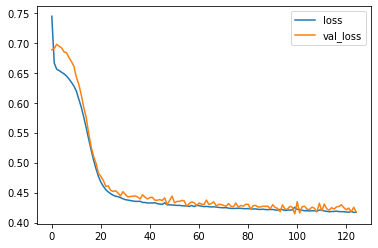

In [309]:
loss_mol = pd.DataFrame(model.history.history)
loss_mol.plot()

In [341]:
pred_0 = model.predict(X_train[0].reshape(1,8))
print(pred_0)

1/1 [==============================] - 0s 26ms/step
[[0.20287956]]


In [15]:
def NN_pred(yhat):
    if yhat >= 0.5:
        return 1
    else:
        return 0

In [16]:
def eval_err(y, yhat):
    m = y.shape[0]
    incorrect = 0
    y = y.tolist()
    for i in range(m):
        if yhat[i] != y[i]:
            incorrect += 1
            
    incorrect = incorrect / m
    
    return incorrect 

In [342]:
results = model.evaluate(X_test, y_test)
print(results)

6/6 [==============================] - 0s 600us/step - loss: 0.4254
0.42539092898368835


In [343]:
prediction_nn = model.predict(X_test)

6/6 [==============================] - 0s 400us/step


In [17]:
def pred_output(prediction):
    ex = prediction.shape[0]
    output = []
    for i in range(ex):
        output.append(NN_pred(prediction[i]))
    
    return output

In [344]:
output = pred_output(prediction_nn)

In [345]:
print('Train Accuracy: %f'%(np.mean(output == y_test) * 100))

Train Accuracy: 82.681564


In [346]:
output_train = pred_output(model.predict(X_train))

23/23 [==============================] - 0s 409us/step


In [347]:
error_cv = eval_err(y_test, output)
error_train = eval_err(y_train, output_train)
print(f"error cv:    {error_cv :0.3f}")
print(f"error train: {error_train :0.3f}")

error cv:    0.173
error train: 0.180


In [348]:
print(classification_report(y_test, output))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        99
           1       0.92      0.68      0.78        80

    accuracy                           0.83       179
   macro avg       0.85      0.81      0.82       179
weighted avg       0.84      0.83      0.82       179



In [349]:
print(confusion_matrix(y_test, output))

[[94  5]
 [26 54]]


In [350]:
model.summary()

Model: "xx_model_NN_tit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                288       
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [288]:
model.save('Model_tf_NN_tit.h5')

## Building a Deep NN

In [231]:
#Create code that runs per layer:
    #Every node uses its weights and np.dots(x, w) + b // Uses the result in the sigmoid function

In [238]:
sigmoid(-0.0049262246684229904)

0.49876844632347345

In [351]:
[l1, l2, l3] = model.layers

In [352]:
W1_tmp, b1_tmp = l1.get_weights()
W2_tmp, b2_tmp = l2.get_weights()
W3_tmp, b3_tmp = l3.get_weights()

In [353]:
print(W1_tmp.shape)
print(W2_tmp.shape)
print(W3_tmp.shape)
print(X_train.shape)
print(X_test.shape)

(8, 32)
(32, 16)
(16, 1)
(712, 8)
(179, 8)


In [354]:
def layers(a_in, W, b, g):
    #Use the input a_in
    units = W.shape[1]
    a_out = np.zeros(units)
    
    for i in range(units):
        res = np.dot(W[:,i], a_in) + b[i]
        a_out[i] = g(res)
        
    return a_out

In [355]:
def sequential(x, W1, b1, W2, b2, W3, b3, g):
    a1 = layers(x, W1, b1, g)
    a2 = layers(a1, W2, b2, g)
    a3 = layers(a2, W3, b3, g)
    
    return a3

In [359]:
def run_nn_built(X):
    ## Get No examples to run prediction
    examples = X.shape[0]
    prediction_nn_built = np.zeros(examples)
    
    for i in range(examples):
        ## Iterate over all examples and add it to prediction
        prob = sequential(X[i], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp, g=sigmoid)
        
        if prob >= 0.5:
            prob = 1
        else:
            prob = 0
            
        prediction_nn_built[i] = prob
        
    return prediction_nn_built

In [373]:
#prediction_xn = sequential(X_train[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp, W4_tmp, b4_tmp, g=sigmoid)
#print(prediction_xn)
pred_nn_built = run_nn_built(X_train)
pred_nn_built_test = run_nn_built(X_test)

In [361]:
error_cv = eval_err(y_test, pred_nn_built_test)
error_train = eval_err(y_train, pred_nn_built)
print(f"error cv:    {error_cv :0.3f}")
print(f"error train: {error_train :0.3f}")

error cv:    0.173
error train: 0.180


In [362]:
print('Train Accuracy: %f'%(np.mean(pred_nn_built_test == y_test) * 100))

Train Accuracy: 82.681564


In [363]:
print(classification_report(y_test, pred_nn_built_test))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        99
           1       0.92      0.68      0.78        80

    accuracy                           0.83       179
   macro avg       0.85      0.81      0.82       179
weighted avg       0.84      0.83      0.82       179



In [365]:
print(confusion_matrix(y_test, pred_nn_built_test))

[[94  5]
 [26 54]]


## Improving the calculation time using matmul instead of np.dot()

In [367]:
def layers_matmul(a_in, W, b, g):
    #Use the input a_in
    
    res = np.matmul(a_in, W) + b
    a_out[i] = g(res)
        
    return a_out

In [368]:
def sequential_matmul(x, W1, b1, W2, b2, W3, b3, g):
    a1 = layers_matmul(x, W1, b1, g)
    a2 = layers_matmul(a1, W2, b2, g)
    a3 = layers_matmul(a2, W3, b3, g)
    
    return a3

In [370]:
def run_nn_built_matmul(X):
    ## Get No examples to run prediction
    examples = X.shape[0]
    prediction_nn_built = np.zeros(examples)
    
    for i in range(examples):
        ## Iterate over all examples and add it to prediction
        prob = sequential_matmul(X[i], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp, g=sigmoid)
        
        if prob >= 0.5:
            prob = 1
        else:
            prob = 0
            
        prediction_nn_built[i] = prob
        
    return prediction_nn_built

In [375]:
pred_nn_built_matmul = run_nn_built(X_train)
pred_nn_built_test_matmul = run_nn_built(X_test)

In [377]:
error_cv = eval_err(y_test, pred_nn_built_test_matmul)
error_train = eval_err(y_train, pred_nn_built_matmul)
print(f"error cv:    {error_cv :0.3f}")
print(f"error train: {error_train :0.3f}")

error cv:    0.173
error train: 0.180


In [379]:
print('Train Accuracy: %f'%(np.mean(pred_nn_built_test_matmul == y_test) * 100))

Train Accuracy: 82.681564


In [386]:
accuracy_score(y_test, pred_nn_built_test_matmul)

0.8268156424581006

## Using XGBoost

Reference:
https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390

In [340]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [376]:
xgb_model = xgb.XGBClassifier()

In [377]:
xgb_model.fit(X_train, y_train)
pred_xgb_model = xgb_model.predict(X_test)

In [378]:
print(accuracy_score(y_test, pred_xgb_model))
print('Train Accuracy: %f'%(np.mean(pred_xgb_model == y_test) * 100))

0.8212290502793296
Train Accuracy: 82.122905


In [379]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [380]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.05, 0.01],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [382]:
grid_cv = GridSearchCV(xgb_model, param_grid, n_jobs=-1, verbose=1, cv=3, scoring='roc_auc')

In [383]:
grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_ca...
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     rand

In [384]:
grid_cv.best_score_

0.8521506734006734

In [385]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 4,
 'reg_lambda': 0,
 'scale_pos_weight': 3,
 'subsample': 0.8}

In [386]:
final_model = xgb.XGBClassifier(**grid_cv.best_params_, objective="binary:logistic")

In [387]:
final_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, ...)

In [388]:
pred_xg_test = final_model.predict(X_test)
pred_xg_train = final_model.predict(X_train)

In [389]:
error_cv = eval_err(y_test, pred_xg_test)
error_train = eval_err(y_train, pred_xg_train)
print(f"error cv:    {error_cv :0.3f}")
print(f"error train: {error_train :0.3f}")

error cv:    0.173
error train: 0.183


In [390]:
print('Test Accuracy: %f'%(np.mean(pred_xg_test == y_test) * 100))

Test Accuracy: 82.681564


## Building a Decision Tree Classifier

In [20]:
## Calculate entropy at y

In [467]:
def calculate_entropy(y):
    
    m = len(y)
    entropy = 0.
    p1 = 0
    ## Size must be bigger than 0
    if m <= 0:
        return entropy
    # Iterate over examples to get p1 (ratio of elements that are positive == 1)
    for i in range(m):
        if y[i] == 1:
            p1 += 1
    ## Getting p1 and, by consequence, p2
    p1 = p1 / m
    p2 = 1 - p1
    
    if p1 == 1 or p1 == 0:
        return entropy
    else:
        #Calculating entropy when p1 is not 0 or 1 (becaus of log2(0) == inf.)
        entropy = (-p1* np.log2(p1)) - (p2 * np.log2(p2))
        
        return entropy

In [468]:
calculate_entropy(y_train)

0.9491065174123546

In [204]:
#Splitting dataset - using current data to split between left and right branches

In [469]:
X_train

array([[1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [470]:
def split_data(X, feature, root_index):
    
    m = X.shape[0]
    left_branch = []
    right_branch = []
    
    for i in range(m):
        if X[i][feature] == 1:
            left_branch.append(i)
        else:
            right_branch.append(i)
            
    return left_branch, right_branch

In [471]:
root_index = np.arange(0, X_train.shape[0])

In [472]:
def info_gain(X, y, feature, node_indices):
    
    info_gain = 0.
    
    left, right = split_data(X, feature, node_indices)
    
    p1_entr = calculate_entropy(y[node_indices])
    left_entr = calculate_entropy(y[left])
    right_entr = calculate_entropy(y[right])
    
    weight_lef = len(left)/ (len(right) + len(left))
    weight_ri = 1 - weight_lef
    
    info_gain = p1_entr - (weight_lef * left_entr + right_entr * weight_ri)
    
    return info_gain

In [473]:
info_gain(X_train, y_train, 0, root_index)

0.20821002408308886

In [474]:
def best_split(X, y, node_indices):
    m, n = X.shape
    
    best_feature = -1
    aux = 0
    gain_hist = []
    
    for i in range(n):
        gain = info_gain(X, y, i, node_indices)
        gain_hist.append(gain)
        if gain > aux:
            best_feature = i
            aux = gain
    
    return best_feature, gain_hist

0
68


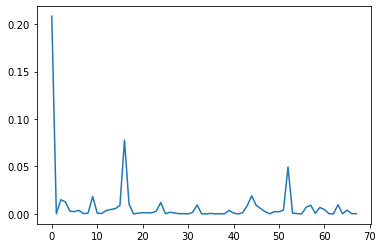

In [475]:
best_feature, gain_hist = best_split(X_train, y_train, root_index)
print(best_feature)
plt.plot(gain_hist)

In [498]:
tree = []

def build_tree_rec(X, y, node_indices, max_depth, current_depth, b_name):

    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % b_name, node_indices[:3])
        return
    
    bf, gh = best_split(X, y, node_indices)
    
    tree.append((current_depth, b_name, bf, node_indices))
    
    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, b_name, best_feature))
    
    left, right = split_data(X, bf, node_indices)
    
    build_tree_rec(X, y, left, max_depth, current_depth+1, "Left")
    build_tree_rec(X, y, right, max_depth, current_depth+1, "Right")
    

In [499]:
build_tree_rec(X_train, y_train, root_index, 2, 0, "Root")

 Depth 0, Root: Split on feature: 0
- Depth 1, Left: Split on feature: 0
  -- Left leaf node with indices [275, 383, 527]
  -- Right leaf node with indices [0, 1, 2]
- Depth 1, Right: Split on feature: 0
  -- Left leaf node with indices [0, 1, 2]
  -- Right leaf node with indices [3, 4, 5]


In [514]:
tree[1][3]

[0,
 1,
 2,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 23,
 25,
 27,
 30,
 31,
 32,
 33,
 34,
 36,
 37,
 39,
 42,
 43,
 45,
 47,
 48,
 49,
 50,
 51,
 52,
 55,
 56,
 57,
 60,
 61,
 63,
 64,
 67,
 68,
 71,
 73,
 74,
 75,
 76,
 77,
 78,
 80,
 81,
 83,
 84,
 86,
 87,
 90,
 95,
 98,
 99,
 101,
 103,
 104,
 105,
 106,
 107,
 109,
 110,
 111,
 112,
 113,
 115,
 116,
 118,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 130,
 131,
 133,
 135,
 137,
 138,
 140,
 141,
 144,
 145,
 146,
 147,
 148,
 151,
 152,
 155,
 156,
 157,
 158,
 159,
 162,
 163,
 165,
 167,
 168,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 178,
 179,
 182,
 184,
 185,
 187,
 188,
 189,
 190,
 193,
 194,
 195,
 196,
 197,
 198,
 200,
 201,
 202,
 204,
 205,
 206,
 207,
 208,
 210,
 212,
 213,
 214,
 215,
 216,
 217,
 219,
 220,
 221,
 222,
 224,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 235,
 236,
 238,
 239,
 240,
 241,
 242,
 243,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 260,
 261,
 

In [517]:
def check_inc(y, yhat):
    correct = 0
    m = len(yhat)
    for i in range(m):
        if y[i] == 1:
            correct += 1
    
    correct = correct / m
        
    return correct

In [520]:
print(check_inc(y_train, tree[1][3])*100)
print(check_inc(y_train, tree[2][3])*100)

36.285097192224626
34.13654618473896


In [519]:
final_df[:20]

,Survived,Sex,Q,S,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,...,Age_Fare_1050.0,Age_Fare_1200.0,Age_Fare_1350.0,Age_Fare_1500.0,Age_Fare_1650.0,Age_Fare_1800.0,Age_Fare_1950.0,Age_Fare_2100.0,Age_Fare_2250.0,Age_Fare_2400.0
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
